In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
path = [i for i in os.listdir() if i[:3] in ['cl-', 'br-', 'scn']]
path

['br-qmmm-am1',
 'br-qmmm-dftb3',
 'br-qmmm-pm3',
 'br-qmmm-pm6',
 'cl-qmmm-am1',
 'cl-qmmm-dftb3',
 'cl-qmmm-pm3',
 'cl-qmmm-pm6',
 'scn-qmmm-am1',
 'scn-qmmm-dftb3',
 'scn-qmmm-pm3',
 'scn-qmmm-pm6']

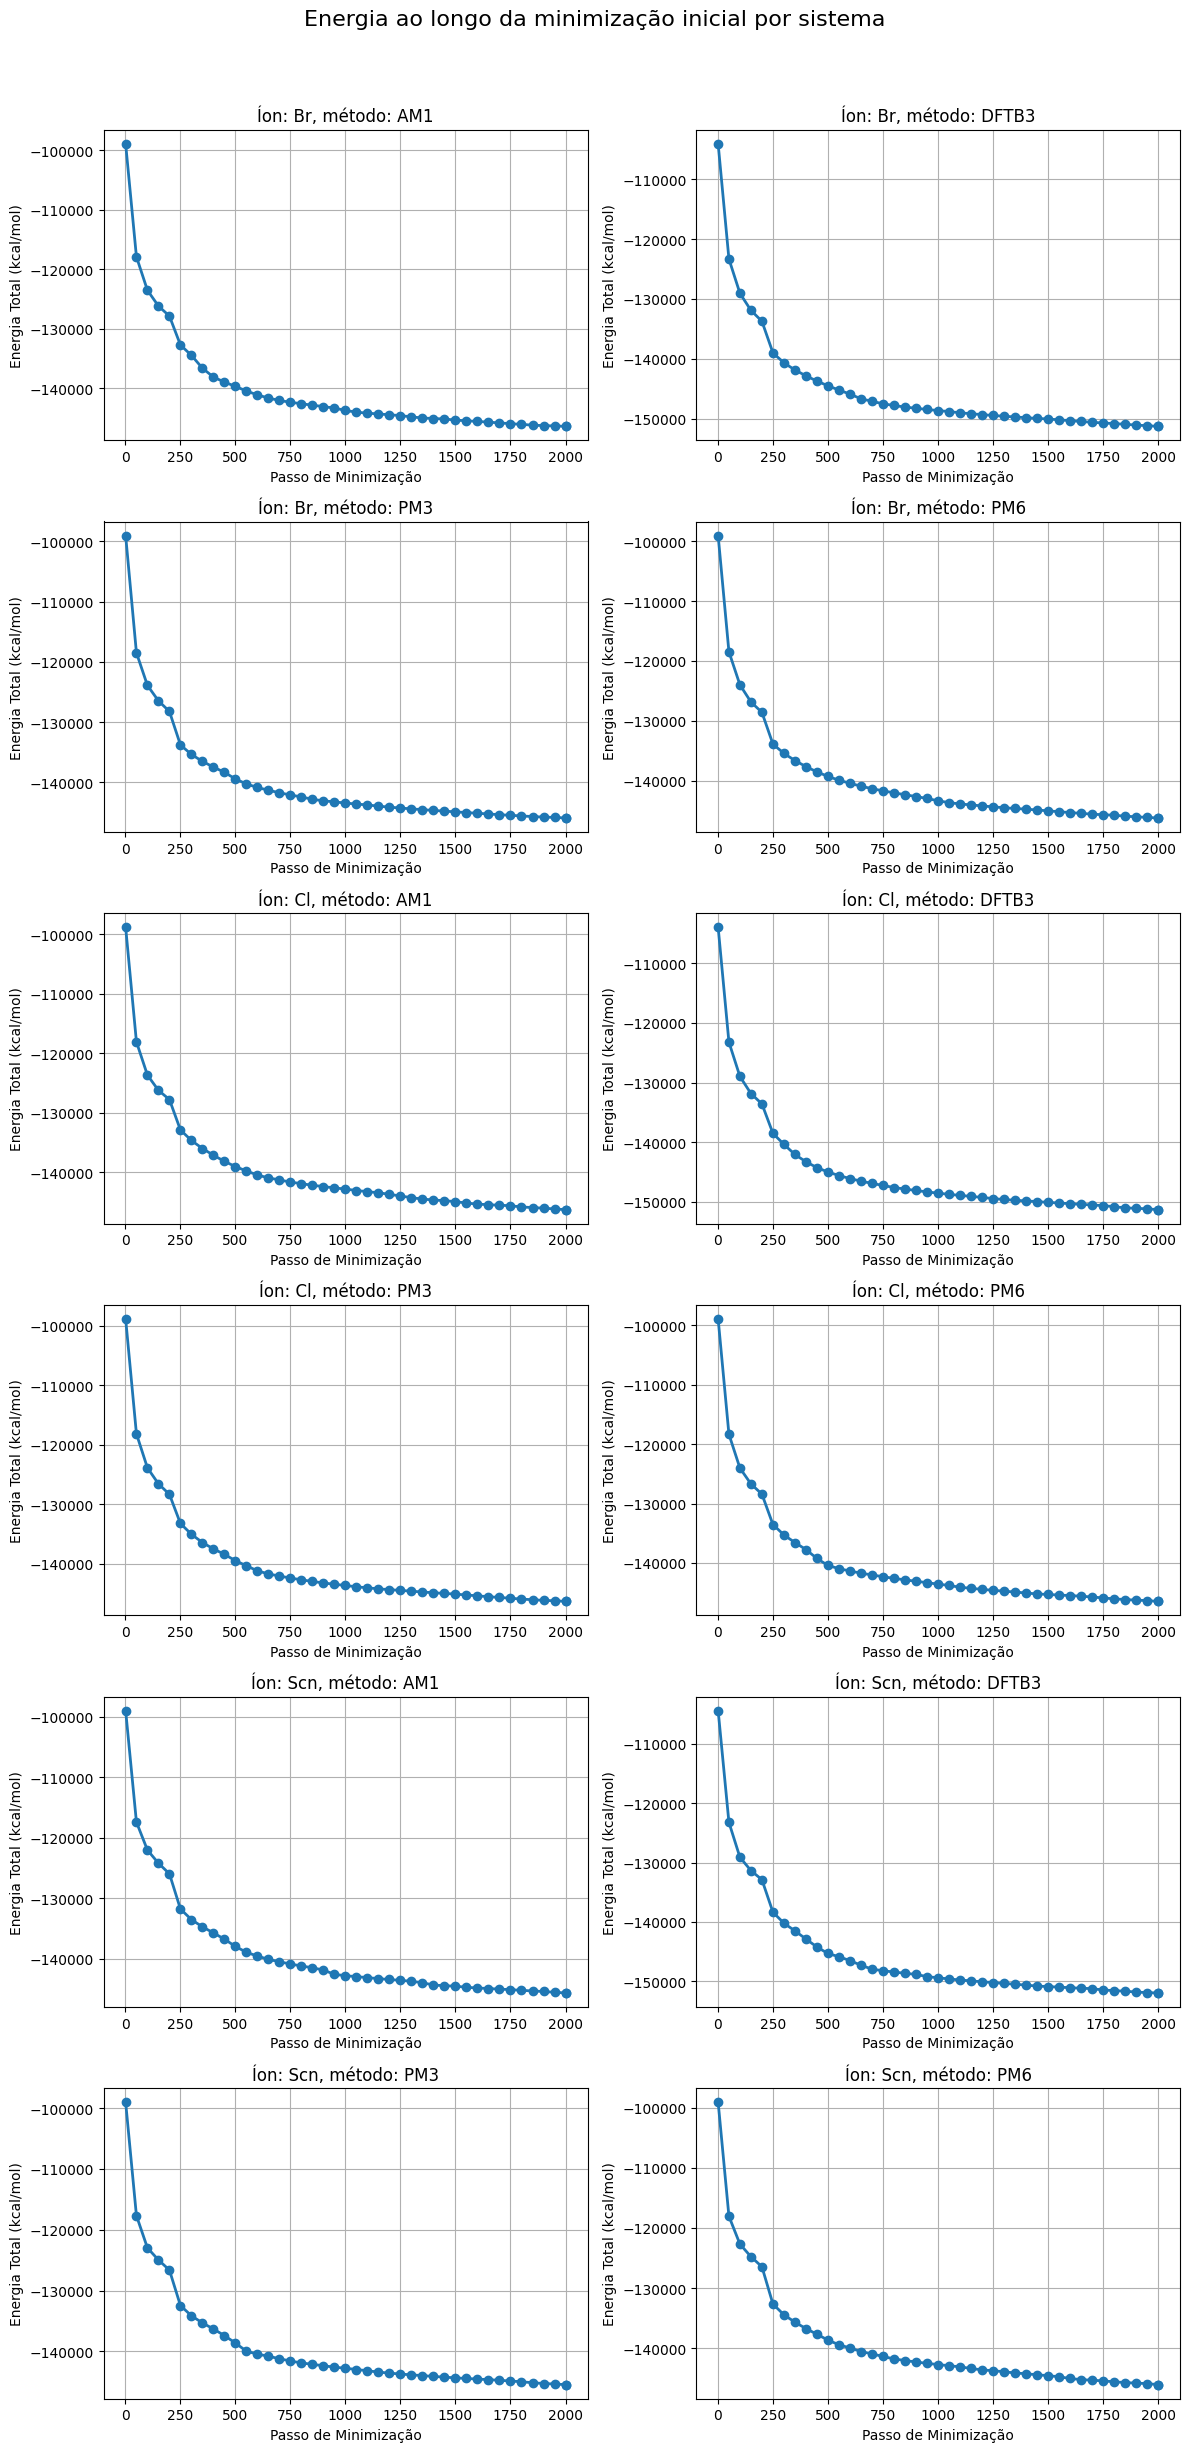

In [3]:
num_systems = len(path)
rows = (num_systems + 1) // 2
cols = 2 if num_systems > 1 else 1

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
fig.suptitle("Energia ao longo da minimização inicial por sistema", fontsize=16, y=1.02)

# Se tivermos apenas um sistema, axes não será um array
if num_systems == 1:
    axes = np.array([axes])

# Achatar o array de eixos para facilitar a iteração
axes = axes.flatten()

for i, current_path in enumerate(path):
    steps = []
    energies = []
    
    with open(f"{current_path}/min.init.log") as f:
        for line in f:
            if re.match(r'^\s*\d+\s+-?\d+\.\d+', line):
                parts = line.split()
                try:
                    steps.append(int(parts[0]))
                    energies.append(float(parts[1]))
                except (IndexError, ValueError):
                    continue
    
    ax = axes[i]
    ax.plot(steps, energies, marker='o', linewidth=2)
    ax.set_xlabel("Passo de Minimização", fontsize=10)
    ax.set_ylabel("Energia Total (kcal/mol)", fontsize=10)
    ax.set_title(f"Íon: {current_path.split('-')[0].title()}, método: {current_path.split('-')[-1].upper()}", 
                 fontsize=12)
    ax.grid(True)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

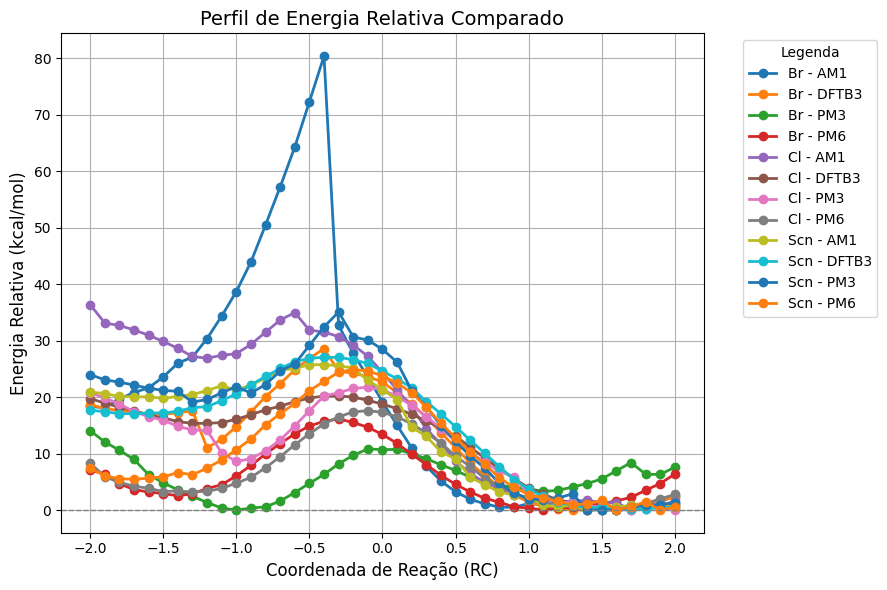

In [5]:
plt.figure(figsize=(9, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(path)))

for i, current_path in enumerate(path):
    df = pd.read_csv(f"{current_path}/energies.dat", sep='\t')
    
    min_energy = df["EAMBER"].min()
    df["E_relativa"] = df["EAMBER"] - min_energy
    
    plt.plot(
        df["RC"], 
        df["E_relativa"], 
        marker='o', 
        linewidth=2,
        label=f"{current_path.split('-')[0].title()} - {current_path.split('-')[-1].upper()}", 
        #color=colors[i]  # Usa cores diferentes
    )

plt.xlabel("Coordenada de Reação (RC)", fontsize=12)
plt.ylabel("Energia Relativa (kcal/mol)", fontsize=12)
plt.title("Perfil de Energia Relativa Comparado", fontsize=14)
plt.axhline(0, linestyle='--', color='gray', linewidth=1)
plt.grid(True)
plt.legend(title="Legenda", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

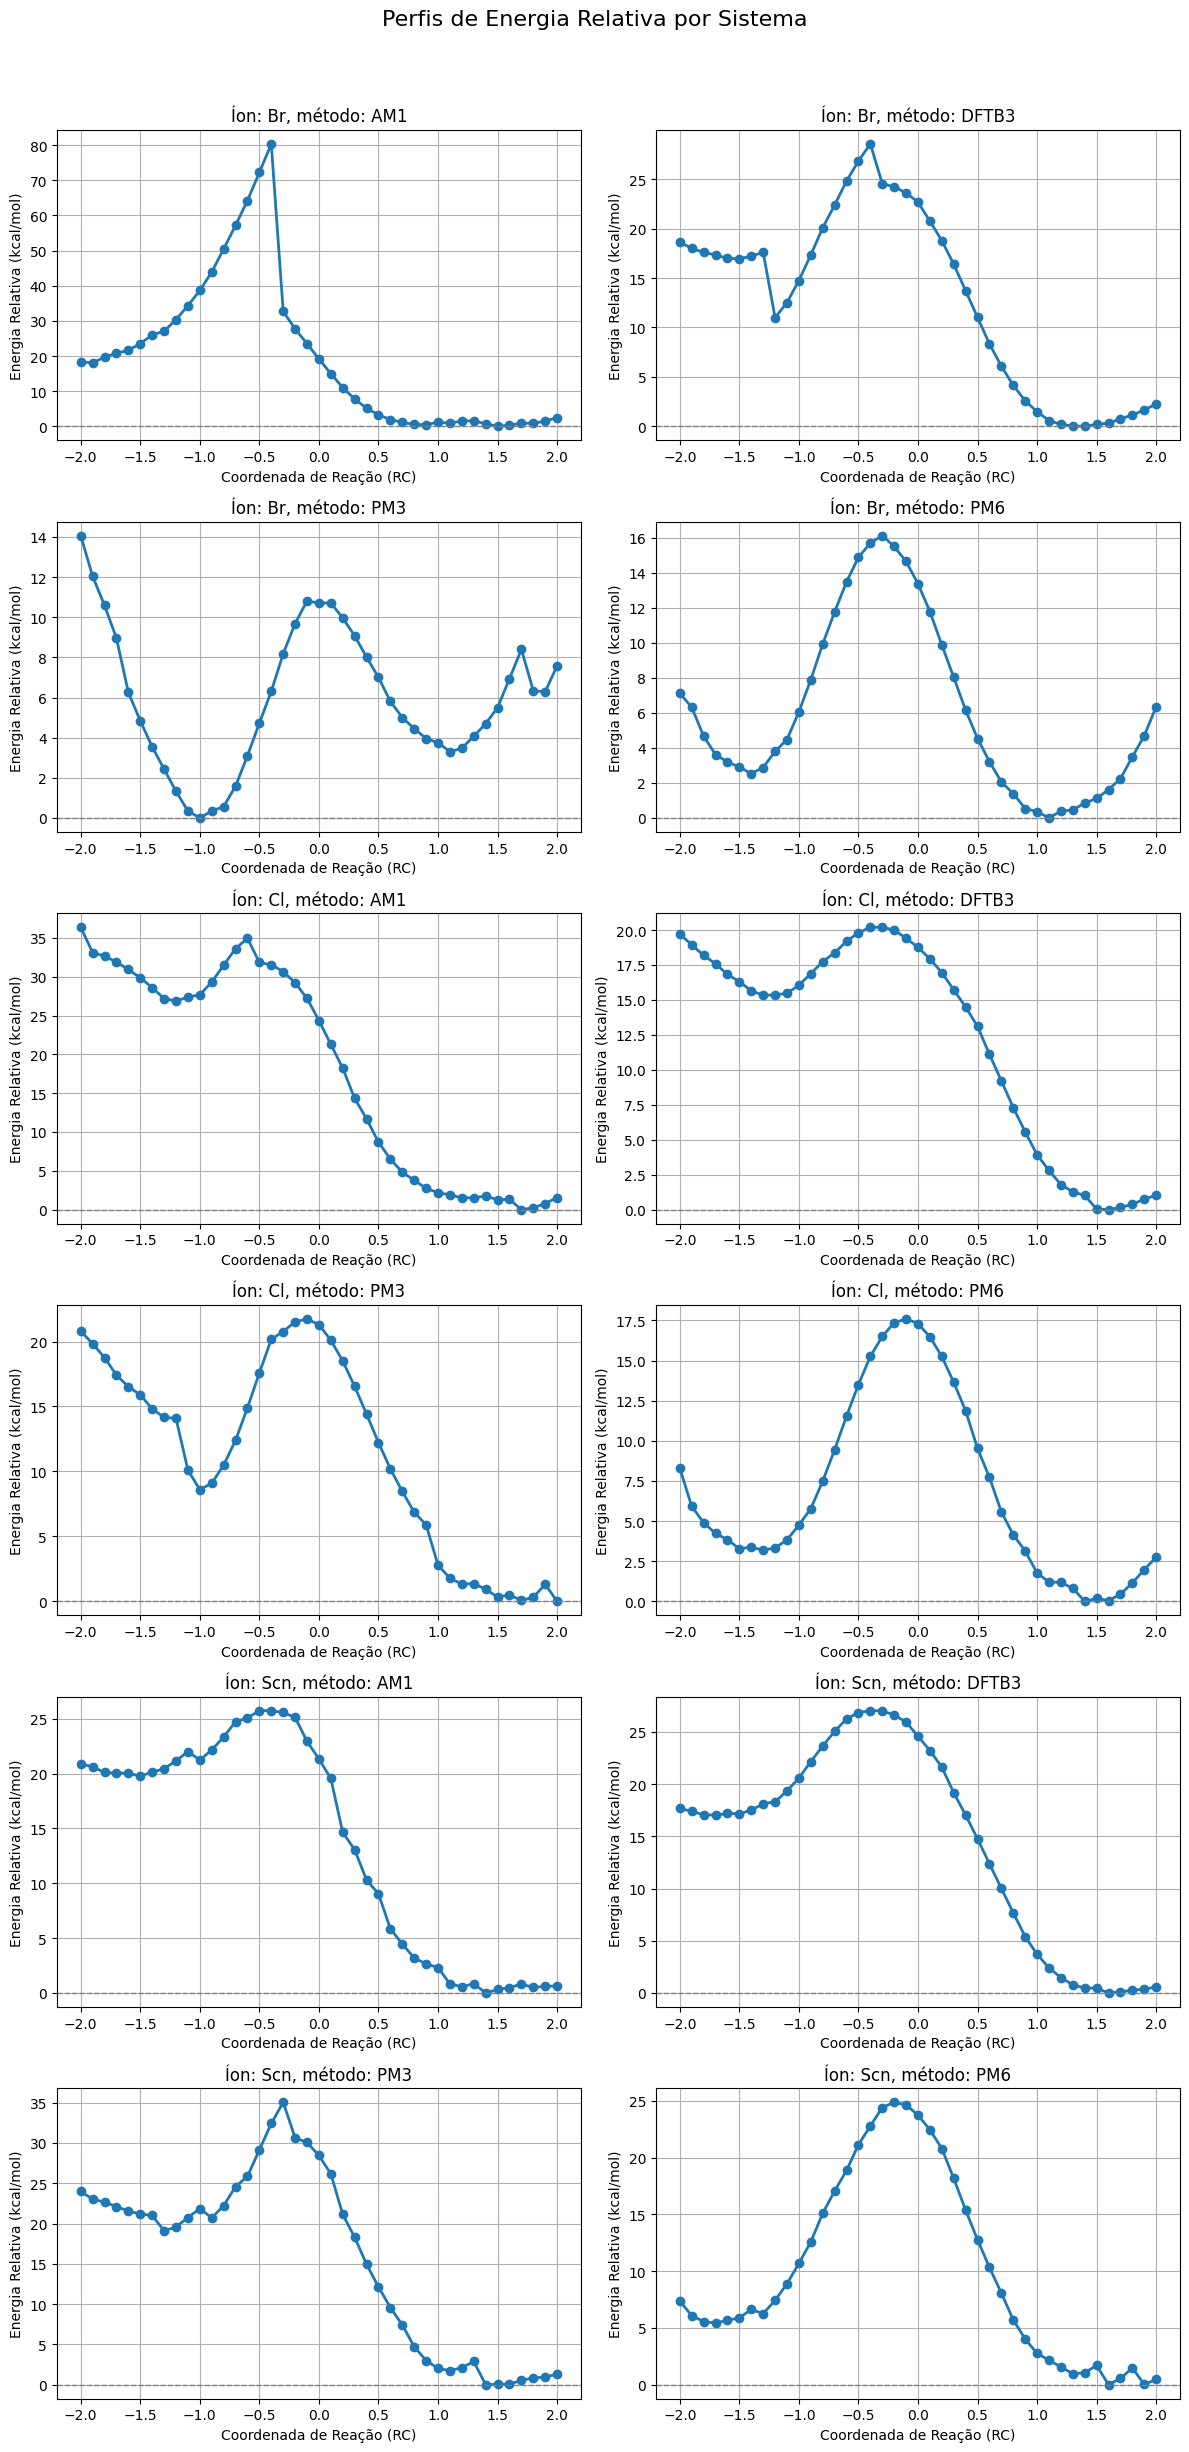

In [7]:
num_systems = len(path)
rows = (num_systems + 1) // 2
cols = 2 if num_systems > 1 else 1

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
fig.suptitle("Perfis de Energia Relativa por Sistema", fontsize=16, y=1.02)

if num_systems == 1:
    axes = np.array([axes])

axes = axes.flatten()

for i, current_path in enumerate(path):
    
    df = pd.read_csv(f"{current_path}/energies.dat", sep='\t')
    min_energy = df["EAMBER"].min()
    df["E_relativa"] = df["EAMBER"] - min_energy

    ax = axes[i]
    ax.plot(df["RC"], df["E_relativa"], marker='o', linewidth=2)
    ax.set_xlabel("Coordenada de Reação (RC)", fontsize=10)
    ax.set_ylabel("Energia Relativa (kcal/mol)", fontsize=10)
    ax.set_title(f"Íon: {current_path.split('-')[0].title()}, método: {current_path.split('-')[-1].upper()}", fontsize=12)  # Nome da pasta como título
    ax.axhline(0, linestyle='--', color='gray', linewidth=1)
    ax.grid(True)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()